In [2]:
import numpy as np
from quilt.builder import OscillatorNetwork
from quilt.builder import EEGcap

import matplotlib.pyplot as plt

# %matplotlib ipympl
%matplotlib inline

In [3]:
global_coupling = 1.0
conduction_speed = 1.0
net = OscillatorNetwork.homogeneous_from_TVB('../brain_data/connectivity_76.zip', 
                                             {'oscillator_type':'jansen-rit'}, 
                                             global_weight=global_coupling, 
                                             conduction_speed=conduction_speed)
net.build()

Oscillators has len (76)
Oscillator network homogeneous constructor
Done Oscillator network homogeneous constructor


In [4]:
T = 5000
np.random.seed(1998)
states = np.random.uniform(0, 0.05, 
                           size=6*net.n_oscillators).reshape(net.n_oscillators, 6)
net.init(states, dt=1)
net.run(time=T)

Initializing oscillators
Running network consisting of 76 oscillators for 5000 timesteps
--------------------------------------------------
**************************************************
Simulation took 0 seconds ( 0.1176 ms/step)


Text(0.5, 0.98, 'Global coupling strength = 1.00')

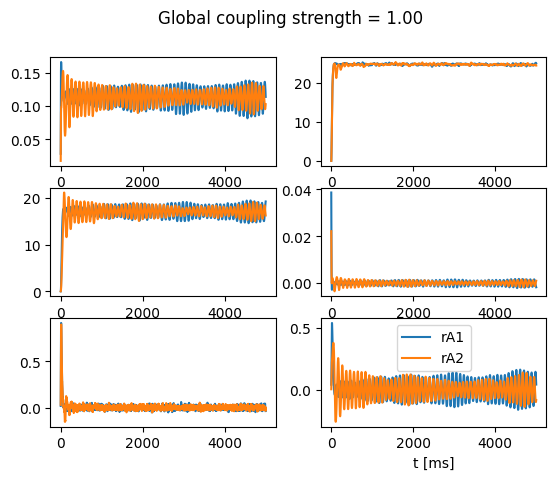

In [5]:
fig,axes = plt.subplots(3,2)
for name, number in zip(net.oscillators.keys(), range(2)):
    for i, ax in enumerate(axes.flatten()):
        ax.plot(net.oscillators[name].history[:, i], label=name)

plt.xlabel("t [ms]")
plt.legend()
plt.suptitle(f"Global coupling strength = {global_coupling:.2f}")

(3000.0, 5000.0)

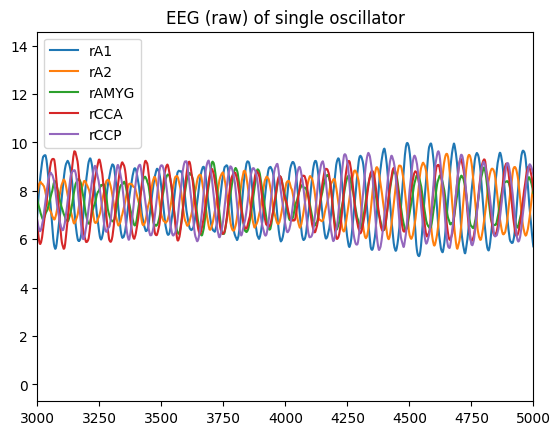

In [6]:
fig, ax = plt.subplots()
for name, number in zip(net.oscillators.keys(), range(5)):
        plt.plot(net.oscillators[name].eeg, label=name)
plt.legend()
plt.title("EEG (raw) of single oscillator")
plt.xlim(3000, 5000)

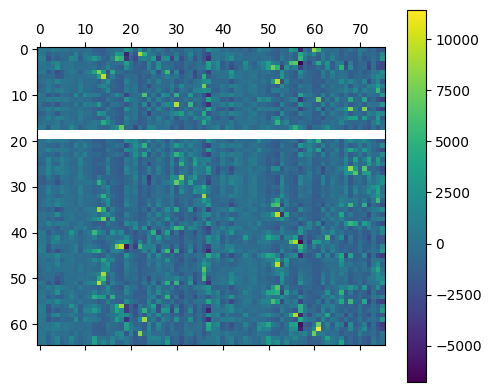

In [7]:
cap = EEGcap("../brain_data/regionMapping_16k_76.txt", 
             "../brain_data/projection_eeg_65_surface_16k.npy")
plt.matshow(cap.weights)
plt.colorbar()


Text(0.5, 0, 't[ms]')

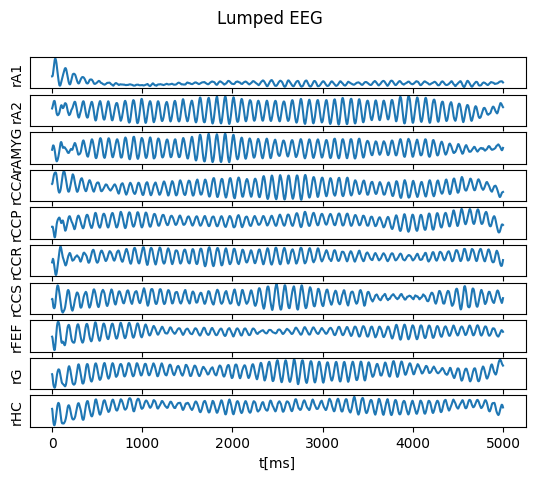

In [10]:
N = 10
fig, axes = plt.subplots(N,1, sharex=True)
eeg = cap.eeg(net, filter_signal=True, bandpass_edges=[0.5, 150])
for i in range(N):
    axes[i].plot(eeg[i]/np.max(np.abs(eeg[i])) + i + 0.4)
    axes[i].set_ylabel(list(net.oscillators.keys())[i], rotation=90)
    axes[i].set_yticks([])
plt.suptitle("Lumped EEG")
plt.xlabel("t[ms]")